# Email Spam Classification using Logistic Regression

In this project I would be training a model to classify emails as spam or ham.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Set up my stuff
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (16, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
email_df = pd.read_csv('email.csv')

In [4]:
email_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
email_df.shape

(5573, 2)

In [6]:
email_df.ndim

2

In [7]:
email_df.Category.unique()

array(['ham', 'spam', '{"mode":"full"'], dtype=object)

In [8]:
email_df.drop(email_df[email_df['Category'] == '{"mode":"full"'].index, inplace=True)

In [9]:
email_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


There isn't much to analyse in this data set so I'll just proceed to preprocess the dataset

## Preprocessing

I'll encode the target column `Category` and convert the text in the `Message` column to lowercase. Initially I tried to split each of the word and I saw that was a problem and words like 'free' were not classified as the same word as 'Free'

After that I'll split the data into 3; training, validation, and test.

In [11]:
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder

email_df['Message'] = email_df['Message'].str.lower()

encoder = LabelEncoder()
email_df['Category'] = encoder.fit_transform(email_df['Category'])

In [12]:
X = email_df['Message']
y = email_df['Category']

X_train_val, X_test, y_train_val, y_test = tts(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = tts(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [13]:
pd.DataFrame(X_train)

,Message
3285,alrite sam its nic just checkin that this is u...
5278,urgent! your mobile number has been awarded wi...
4194,ok i'm coming home now.
2708,great new offer - double mins & double txt on ...
1891,ok but knackered. just came home and went to s...
...,...
975,eh u send wrongly lar...
1135,u wake up already? thanx 4 e tau sar piah it's...
1704,just taste fish curry :-p
1574,sms auction - a brand new nokia 7250 is up 4 a...


In [14]:
pd.DataFrame(y_train)

,Category
3285,0
5278,1
4194,0
2708,1
1891,0
...,...
975,0
1135,0
1704,0
1574,1


In [15]:
pd.DataFrame(X_val)

,Message
3483,do you want a new video phone750 anytime any n...
5229,it means u could not keep ur words.
784,you have an important customer service announc...
1433,thanks for ve lovely wisheds. you rock
5318,"good morning, my love ... i go to sleep now an..."
...,...
2058,"nothing, i got msg frm tht unknown no.."
1585,"sorry, i'll call later"
3432,yeah if we do have to get a random dude we nee...
5286,i'm still pretty weak today .. bad day ?


In [16]:
pd.DataFrame(X_test)

,Message
3245,squeeeeeze!! this is christmas hug.. if u lik ...
944,and also i've sorta blown him off a couple tim...
1044,mmm thats better now i got a roast down me! i...
2484,mm have some kanji dont eat anything heavy ok
812,so there's a ring that comes with the guys cos...
...,...
4264,den only weekdays got special price... haiz......
2439,i not busy juz dun wan 2 go so early.. hee..
5556,yes i have. so that's why u texted. pshew...mi...
4205,how are you enjoying this semester? take care ...


So I would be making use of `CountVectorizer` to convert the text data into numeric data it does this by counting the frequency of each word. And also for less confusion in the data I converted the texts in the Message column to lower case earlier. Now let's proceed to import CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer().fit(X_train)

In [18]:
X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [19]:
dir(vectorizer)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',

Import the model class: Logistic Regression. Also I don't have a clear parameter usage so I'll try some of the hyperparameters but my solver would be `liblinear` because this is a binary problem

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
?LogisticRegression

In [22]:
model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', warm_start=True, n_jobs=-1)

In [23]:
model.fit(X_train, y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn(


LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='liblinear', warm_start=True)

In [24]:
train_pred = model.predict(X_train)

In [25]:
value = pd.DataFrame({
    'Actual': y_train,
    'Prediction': train_pred
})

In [26]:
value

,Actual,Prediction
3285,0,0
5278,1,1
4194,0,0
2708,1,1
1891,0,0
...,...,...
975,0,0
1135,0,0
1704,0,0
1574,1,1


### Scores

I would be using the `.score` since the result is the same with what I'll get using `accuracy_score`.

In [27]:
model.score(X_train, y_train)

0.9988031119090365

In [28]:
model.score(X_val, y_val)

0.9883408071748879

In [29]:
model.score(X_test, y_test)

0.9874439461883409

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
matrix = confusion_matrix(y_train, train_pred)
matrix

array([[2894,    2],
       [   2,  444]], dtype=int64)

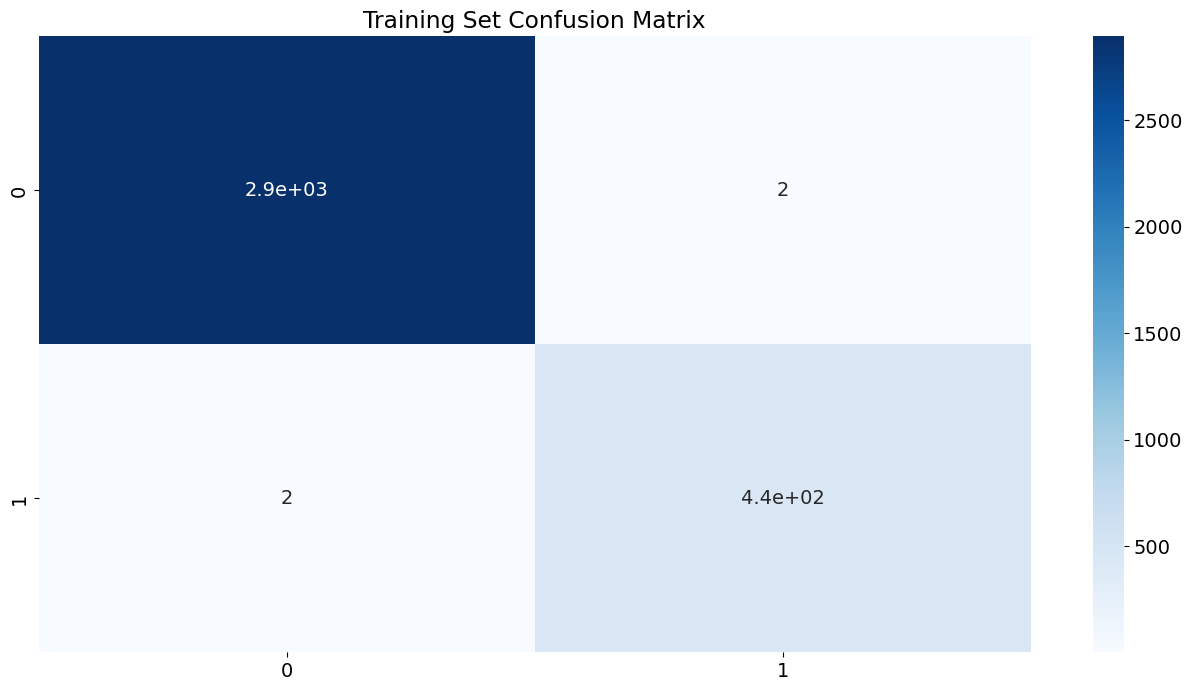

In [32]:
plt.title('Training Set Confusion Matrix')
sns.heatmap(matrix, cmap='Blues', annot=True);

In [33]:
val_pred = model.predict(X_val)

In [34]:
matrix1 = confusion_matrix(y_val, val_pred)

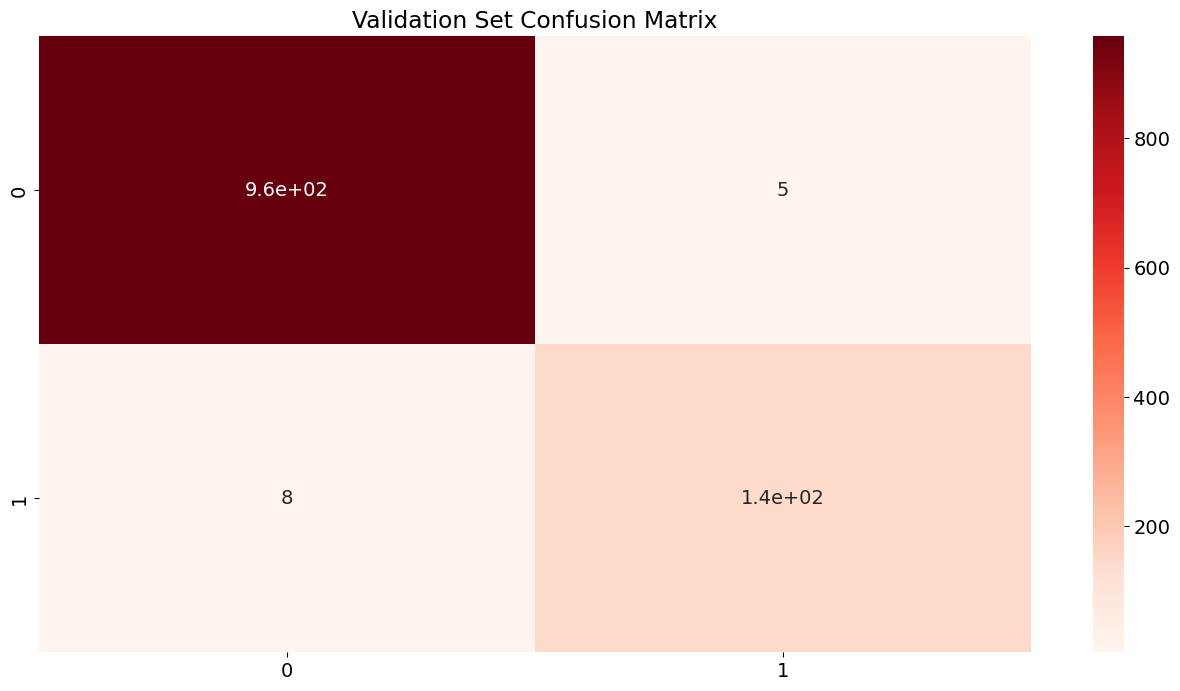

In [35]:
plt.title('Validation Set Confusion Matrix')
sns.heatmap(matrix1, cmap='Reds', annot=True);

In [36]:
test_pred = model.predict(X_test)

In [37]:
matrix2 = confusion_matrix(y_test, test_pred)

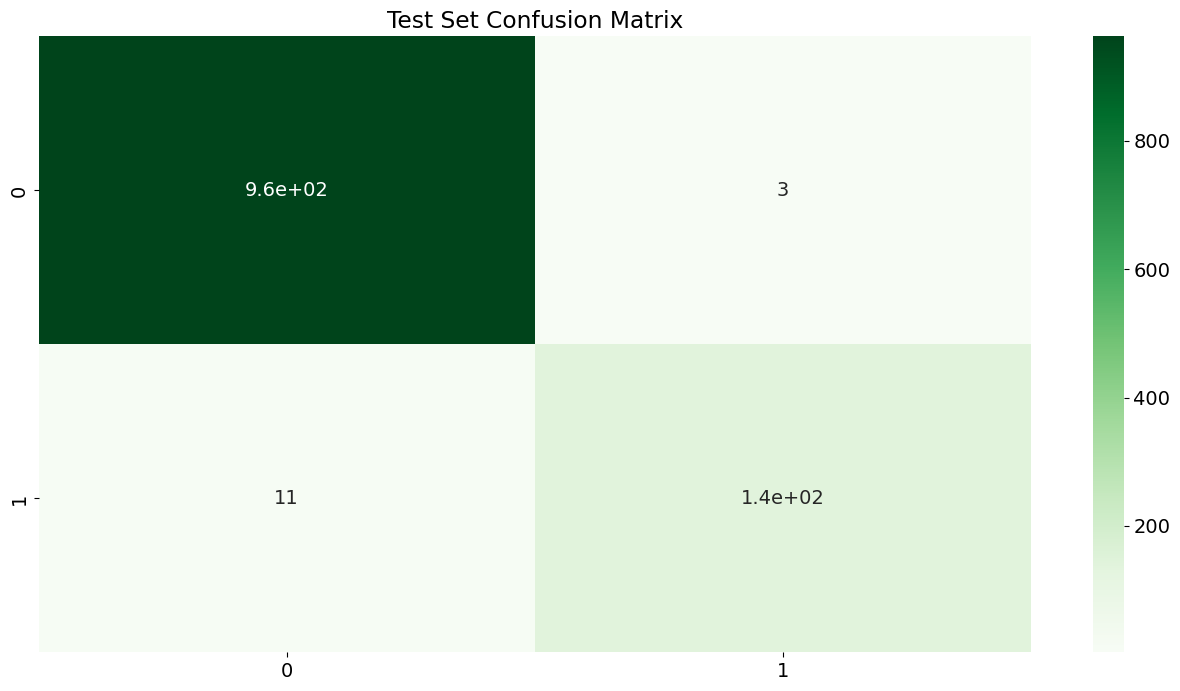

In [38]:
plt.title('Test Set Confusion Matrix')
sns.heatmap(matrix2, cmap='Greens', annot=True);

I asked chatgpt to generate a sample email for and tell me if the email was 'spam' or 'ham'

### Sample Email

Subject: Urgent: Claim Your Free Gift Today!

Dear Customer,

Congratulations! You've been selected to receive a free gift. Claim it now by clicking the link below.

Claim Your Gift Now: [Link]

This offer is only available for a limited time, so act fast!

Best Regards,
[Sender's Name]


!!Spam

In [39]:
# Sample

sample_email = "Subject: Urgent: Claim Your Free Gift Today! Dear Customer, Congratulations! You've been selected to receive a free gift. Claim it now by clicking the link below. Claim Your Gift Now: [Link] This offer is only available for a limited time, so act fast. Best Regards, [Sender's Name]"

In [40]:
sample_email_list = [sample_email]

The main reason I put the `sample_email` in a list is because the vectorizer's (CountVectorizer) transform expect something iterable like a list a single string isn't that.

In [41]:
vectorized_email = vectorizer.transform(sample_email_list)

In [42]:
vectorized_email

<1x6510 sparse matrix of type '<class 'numpy.int64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [43]:
see_sample = model.predict(vectorized_email)

In [44]:
see_sample

array([1])

### Run test2

Subject: Important Notice - Account Verification

Dear Customer,

We have noticed some unusual activity on your account. To ensure the security of your account, please verify your details by clicking on the link below:

[Link to Account Verification]

Thank you for your cooperation.

Best regards,
Customer Support


!!Spam

In [45]:
sample_2 = "Subject: Important Notice - Account Verification Dear Customer, We have noticed some unusual activity on your account. To ensure the security of your account, please verify your details by clicking on the link below: [Link to Account Verification] Thank you for your cooperation. Best regards, Customer Support"

In [46]:
sample2_list = [sample_2]

In [47]:
vectorized_email2 = vectorizer.transform(sample2_list)

In [48]:
model.predict(vectorized_email2)

array([1])

## Final Test Run

Hey there,

Just wanted to check in and see how you're doing. Haven't heard from you in a while. Let me know if there's anything I can help with.

Best regards,
John


!!Ham

In [49]:
sample3 = "Hey there, Just wanted to check in and see how you're doing. Haven't heard from you in a while. Let me know if there's anything I can help with. Best regards, John"

In [50]:
sample3_list = [sample3]

In [51]:
vectorized_email3 = vectorizer.transform(sample3_list)

In [52]:
model.predict(vectorized_email3)

array([0])

The model is pretty good and it does a good job in identifying 'spam' emails and 'ham' emails. Though the score gave me a bit of a concern because the train_set score is the highest and I really wanted it to be the lowest and the test_set score to be the highest but I think the model is pretty good the way it is. T 

In [53]:
# Save model to Joblib
import joblib

email_classification = {
    'model': model,
    'vectorizer': vectorizer,
    'input': X,
    'target': y,
}

In [54]:
joblib.dump(email_classification,'email_classification.joblib')

['email_classification.joblib']